In [1]:
!python -V

Python 3.9.5


In [2]:
from tensorflow.keras.layers import Dense, Input, Flatten, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model

In [4]:
Dense(10, activation='relu')
Flatten(input_shape=(28,28))

In [5]:
import numpy as np
x_train = np.random.randn(5500, 2)

Input(shape=x_train.shape[1:])

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'input_1')>

In [6]:
x_train.shape

(5500, 2)

---
## Dense Layer

In [7]:
dense = Dense(10, activation='relu', name='Dense Layer')

In [8]:
dense

In [9]:
dense2 = Dense(15, activation='softmax')

---
## Activation

In [11]:
dense = Dense(10, kernel_initializer='he_normal', name='Dense Layer')
dense = Activation(dense)

---
## Flatten

In [14]:
Flatten(input_shape=(28,28))

---
## Input

In [20]:
import tensorflow as tf
input_1 = Input(shape=(28,28), dtype=tf.float32)
input_2 = Input(shape=(8,), dtype=tf.int32)

In [21]:
input_1

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_4')>

In [22]:
input_2

<KerasTensor: shape=(None, 8) dtype=int32 (created by layer 'input_5')>

---
## Sequential

In [23]:
from tensorflow.keras.utils import plot_model
# plot_model(model, to_file='model.png')

In [27]:
model = Sequential()
model.add(Input(shape=(28,28)))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 28, 300)           8700      
_________________________________________________________________
dense_6 (Dense)              (None, 28, 100)           30100     
_________________________________________________________________
dense_7 (Dense)              (None, 28, 10)            1010      
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


---
## functional API

In [43]:
inputs = Input(shape=(28,28,1))

x = Flatten(input_shape=(28,28,1))(inputs)
x = Dense(300, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(10, activation = 'softmax')(x)

In [46]:
model = Model(inputs=inputs, outputs=x)

In [47]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_9 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [49]:
from tensorflow.keras.layers import Concatenate

input_layer = Input(shape=(28,28))
hidden1 = Dense(100, activation='relu')(input_layer)
hidden2 = Dense(30, activation='relu')(hidden1)
concat = Concatenate()([input_layer, hidden2])
output = Dense(1)(concat)

model = Model(inputs=[input_layer], outputs=output)

In [50]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 28, 100)      2900        input_10[0][0]                   
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 28, 30)       3030        dense_11[0][0]                   
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 28, 58)       0           input_10[0][0]                   
                                                                 dense_12[0][0]             

In [51]:
input_1 = Input(shape=(10,10), name='input_1')
input_2 = Input(shape=(10,28), name='input_2')

hidden1 = Dense(100, activation='relu')(input_2)
hidden2 = Dense(10, activation='relu')(hidden1)
concat = Concatenate()([input_1, hidden2])
output = Dense(1, activation='sigmoid', name='output')(concat)

model = Model(inputs=[input_1, input_2], outputs=[output])

In [52]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 10, 28)]     0                                            
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 10, 100)      2900        input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 10, 10)       1010        dense_14[0][0]                   
____________________________________________________________________________________________

In [55]:
input_ = Input(shape=(10,10), name='input_')

hidden1 = Dense(100, activation='relu')(input_)
hidden2 = Dense(10, activation='relu')(hidden1)

output = Dense(1, activation='sigmoid', name='main_output')(hidden2)
sub_out = Dense(1, name='sum_output')(hidden2)

model = Model(inputs=[input_], outputs=[output, sub_out])

In [56]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ (InputLayer)             [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_18 (Dense)                (None, 10, 100)      1100        input_[0][0]                     
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 10, 10)       1010        dense_18[0][0]                   
__________________________________________________________________________________________________
main_output (Dense)             (None, 10, 1)        11          dense_19[0][0]                   
____________________________________________________________________________________________

In [57]:
input_1 = Input(shape=(10,10))
input_2 = Input(shape=(10,28))

hidden1 = Dense(100, activation='relu')(input_2)
hidden2 = Dense(10, activation='relu')(hidden1)

concat = Concatenate()([input_1, hidden2])
output = Dense(1, activation='sigmoid')(concat)
sub_out = Dense(1)(hidden2)

model = Model(inputs=[input_1, input_2], outputs=[output, sub_out])

In [58]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 10, 28)]     0                                            
__________________________________________________________________________________________________
dense_20 (Dense)                (None, 10, 100)      2900        input_12[0][0]                   
__________________________________________________________________________________________________
input_11 (InputLayer)           [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 10, 10)       1010        dense_20[0][0]                   
____________________________________________________________________________________________

---
## subclassing

In [ ]:
class MyModel(Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super(MyModel, self).__init__(**kwargs)
        
        self.dense_layer1 = Dense(300, activation=activation)
        self.dense_layer2 = Dense(100, activation=activation)
        self.dense_layer3 = Dense(units, activation=activation)
        
        self.output_layer = Dense(10, activation='softmax')
        
    def call(self, inputs):
        x = self.dense_layer1(inputs)
        x = self.dense_layer2(x)
        x = self.dense_layer3(x)
        x = self.output_layer(x)
        
        return x
        

---
## Weights

In [59]:
inputs = Input(shape=(28,28, 1))

x = Flatten(input_shape=(28,28,1))(inputs)
x = Dense(300, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)

In [60]:
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_25 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_26 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.layers

In [64]:
hidden_2 = model.layers[2]
hidden_2.name

'dense_24'

In [66]:
model.get_layer('dense_24') is hidden_2

True

In [67]:
w, b = hidden_2.get_weights()

In [68]:
w, b

(array([[ 3.7001610e-02, -3.8716856e-02,  4.5826986e-02, ...,
         -6.0855702e-02,  3.2529593e-02, -6.9256388e-02],
        [ 3.7841953e-02, -4.4481926e-02,  1.1223376e-02, ...,
         -1.9314907e-02, -7.0995189e-02,  6.9334418e-02],
        [-3.5575662e-02, -3.7194490e-03, -2.7681693e-02, ...,
          7.3535770e-02,  6.0257986e-02,  1.7405748e-02],
        ...,
        [ 7.0608124e-02, -6.4488009e-02,  1.6130432e-02, ...,
          3.3468135e-02,  7.1502492e-02,  5.3569376e-02],
        [ 3.8861014e-02, -3.4205962e-02, -2.4694446e-02, ...,
         -1.4764298e-02,  5.9305951e-02, -5.6847930e-05],
        [-6.3941076e-02, -3.6847517e-03,  1.6178161e-02, ...,
          2.3377761e-02,  4.8806362e-02,  7.3005319e-02]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.

---
## Compile

In [69]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

---
## Train

In [74]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [75]:
tf.random.set_seed(11241)

In [76]:
(x_train_full, y_train_full), (x_test, y_test) = load_data(path='mnist.npz')
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.3, random_state=111)

In [79]:
num_x_train = (x_train.shape[0])
num_x_val = (x_val.shape[0])
num_x_test = (x_test.shape[0])

In [80]:
print(num_x_train, num_x_val, num_x_test)

42000 18000 10000


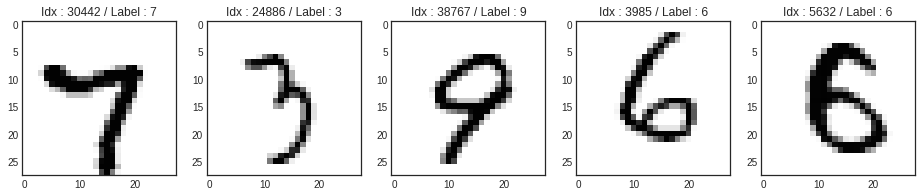

In [88]:
num_sample = 5

random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(16,8))
for i, idx in enumerate(random_idxs):
    img = x_train_full[idx, :]
    label = y_train_full[idx]
    
    plt.subplot(1, len(random_idxs), i+1)
    plt.imshow(img)
    plt.title("Idx : {} / Label : {}".format(idx, label))

In [90]:
x_train = x_train/255.
x_val = x_val / 255.
x_test = x_test / 255.

In [91]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)


In [92]:
model = Sequential([Input(shape=(28,28), name='input'),
                   Flatten(input_shape=[28,28], name='flatten'),
                   Dense(128, activation='relu', name='dense1'),
                   Dense(64, activation='relu', name='dense2'),
                   Dense(32, activation='relu', name='dense3'),
                   Dense(10, activation='softmax', name='output')])

In [93]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 128)               100480    
_________________________________________________________________
dense2 (Dense)               (None, 64)                8256      
_________________________________________________________________
dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [95]:
model.compile(loss='categorical_crossentropy',
             optimizer='sgd',
             metrics=['acc'])

In [97]:
history = model.fit(x_train, y_train, 
                   epochs=50, batch_size=128, validation_data=(x_val,y_val))

Epoch 1/50
329/329 [==============================] - 1s 2ms/step - loss: 1.7104 - acc: 0.5458 - val_loss: 0.9655 - val_acc: 0.7736
Epoch 2/50
329/329 [==============================] - 0s 1ms/step - loss: 0.6740 - acc: 0.8344 - val_loss: 0.5490 - val_acc: 0.8438
Epoch 3/50
329/329 [==============================] - 0s 1ms/step - loss: 0.4588 - acc: 0.8748 - val_loss: 0.4145 - val_acc: 0.8854
Epoch 4/50
329/329 [==============================] - 0s 1ms/step - loss: 0.3854 - acc: 0.8927 - val_loss: 0.3600 - val_acc: 0.8969
Epoch 5/50
329/329 [==============================] - 0s 1ms/step - loss: 0.3446 - acc: 0.9026 - val_loss: 0.3334 - val_acc: 0.9024
Epoch 6/50
329/329 [==============================] - 0s 1ms/step - loss: 0.3174 - acc: 0.9095 - val_loss: 0.3195 - val_acc: 0.9063
Epoch 7/50
329/329 [==============================] - 0s 1ms/step - loss: 0.2958 - acc: 0.9162 - val_loss: 0.3066 - val_acc: 0.9063
Epoch 8/50
329/329 [==============================] - 0s 1ms/step - loss: 0.

In [99]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

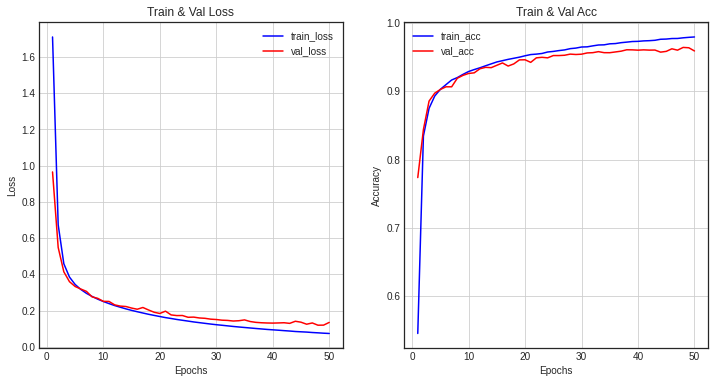

In [101]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train & Val Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['acc']
val_accuracy = history_dict['val_acc']
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, accuracy, color='blue', label='train_acc')
ax2.plot(epochs, val_accuracy, color='red', label='val_acc')
ax2.set_title('Train & Val Acc')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [102]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 443us/step - loss: 0.1177 - acc: 0.9630


[0.11771530658006668, 0.9629999995231628]

In [109]:
pred_ys = model.predict(x_test)
print(pred_ys.shape)

np.set_printoptions(precision=7)
print(pred_ys[0])

(10000, 10)
[1.8384801e-06 1.6404896e-07 3.6991030e-04 1.4038411e-03 3.6883114e-07
 2.3353576e-07 7.2894564e-12 9.9816895e-01 1.3833720e-06 5.3409280e-05]


Text(0.5, 1.0, '7')

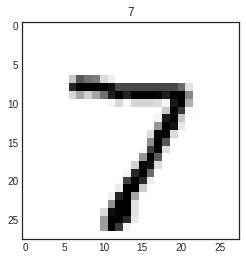

In [111]:
arg_pred_y = np.argmax(pred_ys, axis=1)
plt.imshow(x_test[0])
plt.title(arg_pred_y[0])

In [113]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style='white')

Text(21.5, 0.5, 'true')

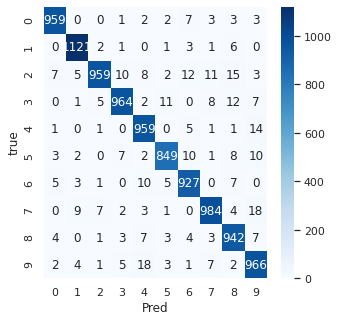

In [117]:
plt.figure(figsize=(5,5))
cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Pred')
plt.ylabel('true')

In [118]:
print(classification_report(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.98      0.93      0.95      1032
           3       0.97      0.95      0.96      1010
           4       0.95      0.98      0.96       982
           5       0.97      0.95      0.96       892
           6       0.96      0.97      0.96       958
           7       0.97      0.96      0.96      1028
           8       0.94      0.97      0.95       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

